In [47]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.signal as sig
sns.set()

In [48]:
def lpf(signal):
    b,a = sig.iirdesign(0.2,0.3,1,37)
    dig_signal = sig.filtfilt(b,a,signal)
    return dig_signal

In [49]:
def upsample(signal, l):
    up = []
    for i in range(len(signal)):
        up.append(signal[i])
        if(i != len(signal)-1):
            for k in range(l-1):
                up.append(0)
    return up

In [50]:
def downsample(signal, m):
    down = []
    for i in range(0, len(signal), m):
        down.append(signal[i])
    return down

In [51]:
f = 40
fs1 = 1000
Ts = 1/fs1
t = np.linspace(0,0.5,200)
n = np.arange(0,0.5/Ts)
nTs = n*Ts
x1 = np.sin(2*np.pi*f*t)
x2 = np.sin(2*np.pi*f*nTs)

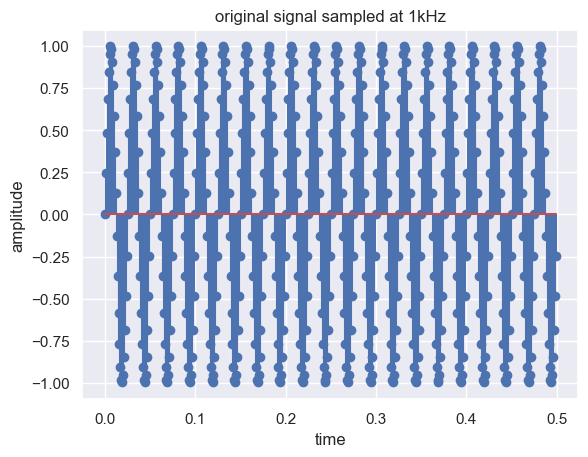

In [52]:
plt.stem(nTs, x2)
plt.title("original signal sampled at 1kHz")
plt.xlabel("time")
plt.ylabel("amplitude")
plt.show()

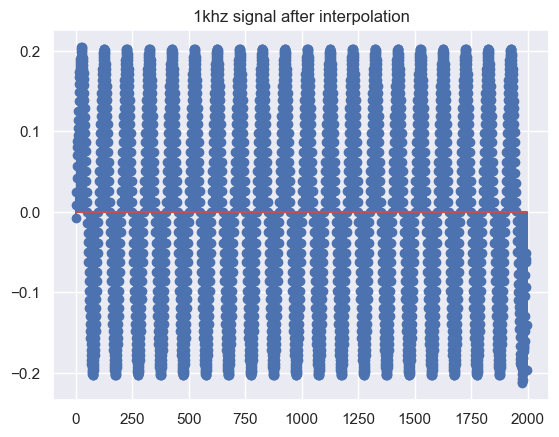

In [53]:
upsamop = upsample(x2, 4)
#INTERPOLATION =  UPSAMPLING + LOW PASS FILTER
lpf_op = lpf(upsamop)
plt.stem(lpf_op)
plt.title("1khz signal after interpolation")
plt.show()

In [54]:
fs1 = 1000
Ts = 1/fs1
n = np.arange(0,0.5/Ts)
nTs = n*Ts
x2 = np.sin(2*np.pi*f*nTs)

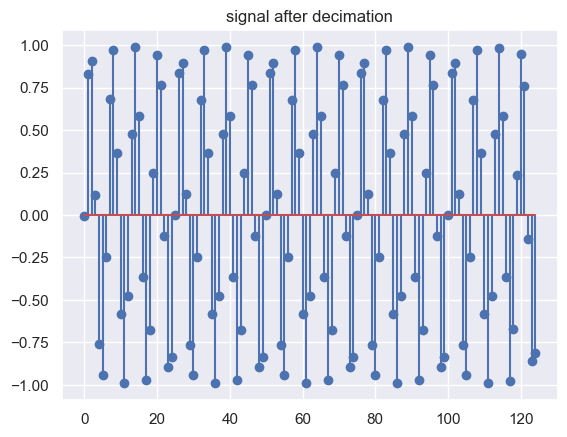

In [55]:
#DECIMATION = LPF + DOWNSAMPLE
lpfop = lpf(x2)
downsamop = downsample(lpfop, 4)
plt.stem(downsamop)
plt.title("signal after decimation")
plt.show()